# 1.Data Overview

## 1.1 Data Introduction

The dataset comprises a comprehensive collection of seismic events spanning 30 years, from 1993 to 2023, in the South Japan Sea and North Philippine Sea Region. Sourced from the United States Geological Survey (USGS), a premier agency providing reliable and detailed geophysical data, this dataset encapsulates crucial information about each earthquake recorded in this seismically active zone. The data is meticulously structured across several columns, capturing the date and time of occurrence (time), geographical coordinates (latitude, longitude), focal depths (depth), and magnitudes (mag) among others, which are pivotal to understanding the seismicity of the region.

Each entry in the dataset not only quantifies the magnitude of an earthquake but also provides the type of magnitude measured (magType), the number of seismic stations reporting (nst), the angular gap between the stations (gap), and the distance to the nearest station from the epicenter (dmin). The dataset further enriches the data quality with measurements of the root mean square (RMS) of the seismic signal (rms), providing insights into the vibrations' spread. Unique identifiers (id), along with the update timestamps (updated), ensure the traceability and the currency of the information.

The dataset also includes error metrics (horizontalError, depthError, magError) that impart critical information about the precision of the recorded data, which is essential for the integrity and robustness of any subsequent analysis. The status of the data review (status), along with the sources of the location and magnitude information (locationSource, magSource), further adds to the dataset's credibility.

In essence, this dataset not only serves as a historical ledger of seismic activity but also provides a fertile ground for predictive modeling and anomaly detection through machine learning techniques. By examining patterns, trends, and outliers within this data, I aim to gain insights into the seismic behavior of the South Japan Sea region and assess the potential for significant future seismic events.

## 1.2 Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_UP, ROUND_DOWN

#import the datafiles
file_1983_1992 = '1983-1992_J.csv'
file_1993_2002 = '1993-2002_J.csv'
file_2003_2012 = '2003-2012_J.csv'
file_2013_2023 = '2013-2023_J.csv'

# Read the files into separate DataFrames
df1 = pd.read_csv(file_1983_1992)
df2 = pd.read_csv(file_1993_2002)
df3 = pd.read_csv(file_2003_2012)
df4 = pd.read_csv(file_2013_2023)

# Combine the DataFrames into one
combined_df = pd.concat([df4,df3, df2, df1], ignore_index=True)

# Verify the combined DataFrame
print(combined_df.head())

                       time  latitude  longitude    depth  mag magType   nst  \
0  2023-12-31T22:13:49.174Z   13.9526   144.5892  193.928  4.2      mb  38.0   
1  2023-12-31T19:19:14.340Z   12.2725   143.3492   30.121  4.6      mb  24.0   
2  2023-12-31T14:37:38.234Z   28.1762   130.6658   24.420  4.8      mb  74.0   
3  2023-12-31T04:19:26.515Z   44.5454   148.9932   35.000  4.3      mb  49.0   
4  2023-12-31T03:02:20.201Z   20.0351   145.6748  123.949  4.2      mb  28.0   

     gap    dmin   rms  ...                   updated  \
0  100.0   0.452  0.53  ...  2024-03-02T21:39:37.040Z   
1   60.0   1.977  1.11  ...  2024-03-02T21:39:37.040Z   
2  117.0   2.399  0.72  ...  2024-03-02T21:39:34.040Z   
3  180.0   4.954  0.70  ...  2024-03-02T21:39:34.040Z   
4  107.0  17.154  0.79  ...  2024-03-02T21:39:37.040Z   

                                           place        type horizontalError  \
0          54 km NNW of Asan-Maina Village, Guam  earthquake            7.53   
1              1

In [2]:
# show the overview shape of the datasets
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(7194, 22)
(14929, 22)
(19779, 22)
(17490, 22)


In [46]:
combined_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-31T22:13:49.174Z,13.9526,144.5892,193.928,4.2,mb,38.0,100.0,0.452,0.53,...,2024-03-02T21:39:37.040Z,"54 km NNW of Asan-Maina Village, Guam",earthquake,7.53,6.416,0.103,26.0,reviewed,us,us
1,2023-12-31T19:19:14.340Z,12.2725,143.3492,30.121,4.6,mb,24.0,60.0,1.977,1.11,...,2024-03-02T21:39:37.040Z,"180 km SW of Merizo Village, Guam",earthquake,8.98,5.924,0.141,15.0,reviewed,us,us
2,2023-12-31T14:37:38.234Z,28.1762,130.6658,24.420,4.8,mb,74.0,117.0,2.399,0.72,...,2024-03-02T21:39:34.040Z,"108 km ESE of Tatsugō, Japan",earthquake,6.46,5.047,0.058,92.0,reviewed,us,us
3,2023-12-31T04:19:26.515Z,44.5454,148.9932,35.000,4.3,mb,49.0,180.0,4.954,0.70,...,2024-03-02T21:39:34.040Z,"116 km SE of Kuril’sk, Russia",earthquake,10.91,1.952,0.092,34.0,reviewed,us,us
4,2023-12-31T03:02:20.201Z,20.0351,145.6748,123.949,4.2,mb,28.0,107.0,17.154,0.79,...,2024-03-02T21:39:37.040Z,"Maug Islands region, Northern Mariana Islands",earthquake,15.47,8.102,0.140,16.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,1983-01-03T18:53:32.120Z,41.0360,141.7790,76.600,4.8,mb,NaN,NaN,NaN,1.20,...,2014-11-07T00:32:26.543Z,"50 km NE of Misawa, Japan",earthquake,NaN,4.200,NaN,16.0,reviewed,us,us
59388,1983-01-02T13:08:40.830Z,35.5690,141.4470,33.000,4.7,mb,NaN,NaN,NaN,1.10,...,2014-11-07T00:32:25.951Z,"58 km ESE of Hasaki, Japan",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
59389,1983-01-02T12:09:40.230Z,33.8060,139.5030,18.800,4.4,mb,NaN,NaN,NaN,1.10,...,2014-11-07T00:32:25.887Z,"109 km SSE of Shimoda, Japan",earthquake,NaN,2.600,NaN,2.0,reviewed,us,us
59390,1983-01-01T11:02:04.560Z,16.9450,147.7390,33.000,4.4,mb,NaN,NaN,NaN,1.40,...,2014-11-07T00:32:25.362Z,"286 km NE of Saipan, Northern Mariana Islands",earthquake,NaN,NaN,NaN,4.0,reviewed,us,us


## 1.3 Data Visualization

### 1.3.1 Line plot

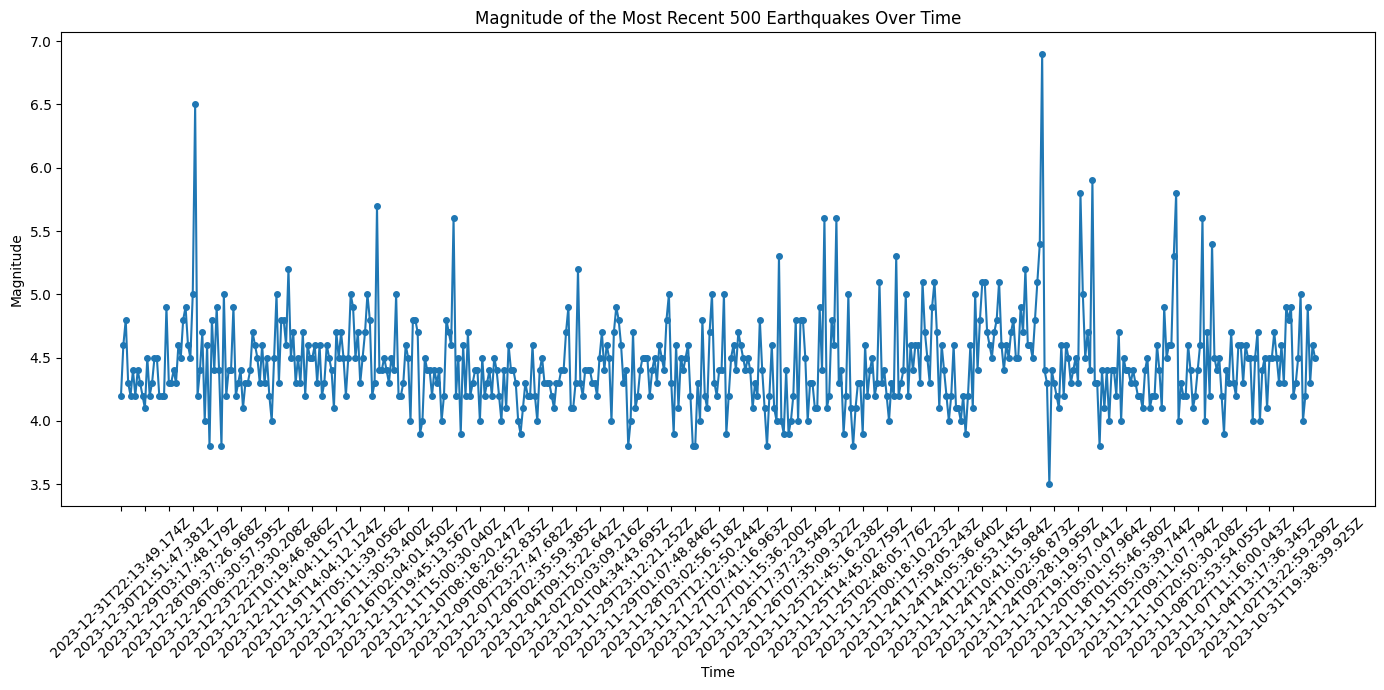

In [44]:
# Select the last 500 earthquakes for visualization
recent_earthquakes = combined_df[0:500]

# Time Series Plot for the most recent 500 earthquakes
plt.figure(figsize=(14, 7))
plt.plot(recent_earthquakes['time'], recent_earthquakes['mag'], marker='o', linestyle='-', markersize=4)

# Set the frequency of the x-axis labels to show one label every 10 earthquakes
tick_spacing = 10
plt.xticks(ticks=recent_earthquakes['time'][::tick_spacing], rotation=45)

plt.title('Magnitude of the Most Recent 500 Earthquakes Over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.tight_layout() 
plt.show()

### 1.3.2 Heatmap

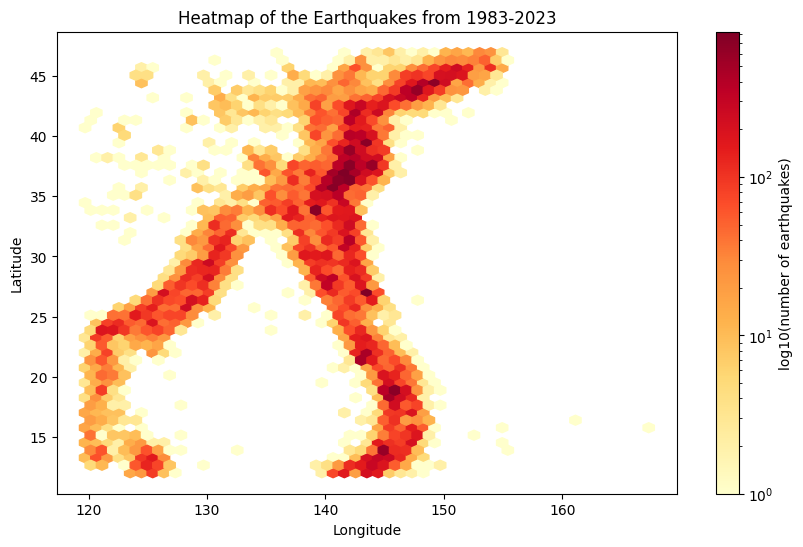

In [47]:
# Create a heatmap using a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(combined_df['longitude'], combined_df['latitude'], gridsize=50, cmap='YlOrRd', bins='log')
plt.colorbar(label='log10(number of earthquakes)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of the Earthquakes from 1983-2023')
plt.show()

# 2. Data cleaning

In [4]:
# Filter out data where 'magtype' is "ml", "mw", or "mb"
filtered_df = combined_df[combined_df['magType'].isin(['ml', 'mw', 'mb'])]

def round_new(value):
    value = Decimal(value)
    precision = Decimal('0.1')
    if value >= Decimal('5.0'):
        return float((value / precision).quantize(Decimal('1'), rounding=ROUND_UP) * precision)
    else:
        return float((value / precision).quantize(Decimal('1'), rounding=ROUND_DOWN) *precision)

# Create a new column 'mag_mw' to store the converted values
# Unify the mag measurement by formulation
def convert_mag(row):
    if row['magType'] == 'ml':
        return round_new((row['mag'] - 1.08) / 0.78)
    elif row['magType'] == 'mb':
        return round_new(((1.64 * row['mag']) - 2.68) / 0.78)
    elif row['magType'] == 'mw':
        return row['mag']

filtered_df['mag_mw'] = filtered_df.apply(convert_mag, axis=1)

C:\Users\Hoshea\AppData\Local\Temp\ipykernel_16804\3312940909.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mag_mw'] = filtered_df.apply(convert_mag, axis=1)


In [5]:
filtered_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,mag_mw
0,2023-12-31T22:13:49.174Z,13.9526,144.5892,193.928,4.2,mb,38.0,100.0,0.452,0.53,...,"54 km NNW of Asan-Maina Village, Guam",earthquake,7.53,6.416,0.103,26.0,reviewed,us,us,5.4
1,2023-12-31T19:19:14.340Z,12.2725,143.3492,30.121,4.6,mb,24.0,60.0,1.977,1.11,...,"180 km SW of Merizo Village, Guam",earthquake,8.98,5.924,0.141,15.0,reviewed,us,us,6.3
2,2023-12-31T14:37:38.234Z,28.1762,130.6658,24.420,4.8,mb,74.0,117.0,2.399,0.72,...,"108 km ESE of Tatsugō, Japan",earthquake,6.46,5.047,0.058,92.0,reviewed,us,us,6.7
3,2023-12-31T04:19:26.515Z,44.5454,148.9932,35.000,4.3,mb,49.0,180.0,4.954,0.70,...,"116 km SE of Kuril’sk, Russia",earthquake,10.91,1.952,0.092,34.0,reviewed,us,us,5.7
4,2023-12-31T03:02:20.201Z,20.0351,145.6748,123.949,4.2,mb,28.0,107.0,17.154,0.79,...,"Maug Islands region, Northern Mariana Islands",earthquake,15.47,8.102,0.140,16.0,reviewed,us,us,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59387,1983-01-03T18:53:32.120Z,41.0360,141.7790,76.600,4.8,mb,NaN,NaN,NaN,1.20,...,"50 km NE of Misawa, Japan",earthquake,NaN,4.200,NaN,16.0,reviewed,us,us,6.7
59388,1983-01-02T13:08:40.830Z,35.5690,141.4470,33.000,4.7,mb,NaN,NaN,NaN,1.10,...,"58 km ESE of Hasaki, Japan",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us,6.5
59389,1983-01-02T12:09:40.230Z,33.8060,139.5030,18.800,4.4,mb,NaN,NaN,NaN,1.10,...,"109 km SSE of Shimoda, Japan",earthquake,NaN,2.600,NaN,2.0,reviewed,us,us,5.9
59390,1983-01-01T11:02:04.560Z,16.9450,147.7390,33.000,4.4,mb,NaN,NaN,NaN,1.40,...,"286 km NE of Saipan, Northern Mariana Islands",earthquake,NaN,NaN,NaN,4.0,reviewed,us,us,5.9


In [6]:
# calculate the energy as new feature
# filtered_df['energy'] = np.exp(5.24) * np.exp(1.44 * filtered_df['mag'])

In [7]:
df = pd.DataFrame()
df

""


In [8]:
# get the feature we will use for training from combined dataframe
df[['time','latitude','longitude','depth','mag']]=filtered_df[['time','latitude','longitude','depth','mag_mw']]
df = df.reset_index(drop=True)

In [9]:
df.tail

<bound method NDFrame.tail of                            time  latitude  longitude    depth  mag
0      2023-12-31T22:13:49.174Z   13.9526   144.5892  193.928  5.4
1      2023-12-31T19:19:14.340Z   12.2725   143.3492   30.121  6.3
2      2023-12-31T14:37:38.234Z   28.1762   130.6658   24.420  6.7
3      2023-12-31T04:19:26.515Z   44.5454   148.9932   35.000  5.7
4      2023-12-31T03:02:20.201Z   20.0351   145.6748  123.949  5.4
...                         ...       ...        ...      ...  ...
52267  1983-01-03T18:53:32.120Z   41.0360   141.7790   76.600  6.7
52268  1983-01-02T13:08:40.830Z   35.5690   141.4470   33.000  6.5
52269  1983-01-02T12:09:40.230Z   33.8060   139.5030   18.800  5.9
52270  1983-01-01T11:02:04.560Z   16.9450   147.7390   33.000  5.9
52271  1983-01-01T10:46:13.720Z   16.9960   147.2990   43.900  6.5

[52272 rows x 5 columns]>

# 3.Feature Engineering

In [10]:
# calculate the distance to the previous earthquake
df[['dif_lat','dif_long']] = df[['latitude','longitude']].shift(-1) - df[['latitude','longitude']]
df[['dif_lat','dif_long']] = df[['dif_lat','dif_long']].abs()
df['distance']=(np.sqrt((df['dif_lat'] ** 2)+(df['dif_long'] ** 2))) *111

# we assume that if the distance is smaller than 40km, then this earthquake is the aftershock of the previous one
threshold = 40
df['cat_afs'] = (df['distance'] <= threshold).astype(int)

# # get the sequence of the aftershock
# # set the default seq as 0
df['seq_afs']=0

for i in range(len(df)-2,-1,-1):
    if df.loc[i,'cat_afs'] == 1:
        df.loc[i,'seq_afs'] = df.loc[i+1,'seq_afs'] + 1

# get the magnitude and depth of the main earthquake
# set the default main_mag as 0
mag_main = [0] * len(df)

for i in range(len(df)):
    if df.loc[i,'cat_afs'] == 1:
        sequence = df.loc[i,'seq_afs']
        mag_main[i] = df.loc[i - sequence, 'mag']

df['mag_main'] = mag_main

# set the default main_depth as 0
depth_main = [0] * len(df)

for i in range(len(df)):
    if df.loc[i,'cat_afs'] == 1:
        sequence = df.loc[i,'seq_afs']
        depth_main[i] = df.loc[i - sequence, 'depth']

df['depth_main'] = depth_main

# get the magnitude and depth of the previous earthquake
df[['mag_pre','depth_pre']] = df[['mag','depth']].shift(-1)

# set the values of mag_pre and depth_pre to 0 for main earthquake
for i in range(len(df)):
    if df.loc[i,'cat_afs'] == 1:
        df.loc[i,'mag_pre'] = 0
        df.loc[i,'depth_pre'] = 0


In [11]:
# store the target which is the next magnitude of aftershock
df['target'] = df['mag'].shift(1)

# since we are prediction the aftershock ,so we will only remain the target magnitude of aftershock
for i in range(len(df)-2,-1,-1):
    if df.loc[i,'cat_afs'] == 0:
        df.loc[i+1,'target'] = 0

In [12]:
df

,time,latitude,longitude,depth,mag,dif_lat,dif_long,distance,cat_afs,seq_afs,mag_main,depth_main,mag_pre,depth_pre,target
0,2023-12-31T22:13:49.174Z,13.9526,144.5892,193.928,5.4,1.6801,1.2400,231.783735,0,0,0.0,0.0,6.3,30.121,NaN
1,2023-12-31T19:19:14.340Z,12.2725,143.3492,30.121,6.3,15.9037,12.6834,2257.960214,0,0,0.0,0.0,6.7,24.420,0.0
2,2023-12-31T14:37:38.234Z,28.1762,130.6658,24.420,6.7,16.3692,18.3274,2727.630036,0,0,0.0,0.0,5.7,35.000,0.0
3,2023-12-31T04:19:26.515Z,44.5454,148.9932,35.000,5.7,24.5103,3.3184,2745.464640,0,0,0.0,0.0,5.4,123.949,0.0
4,2023-12-31T03:02:20.201Z,20.0351,145.6748,123.949,5.4,0.0761,0.3437,39.074665,1,1,5.7,35.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52267,1983-01-03T18:53:32.120Z,41.0360,141.7790,76.600,6.7,5.4670,0.3320,607.954944,0,0,0.0,0.0,6.5,33.000,0.0
52268,1983-01-02T13:08:40.830Z,35.5690,141.4470,33.000,6.5,1.7630,1.9440,291.304797,0,0,0.0,0.0,5.9,18.800,0.0
52269,1983-01-02T12:09:40.230Z,33.8060,139.5030,18.800,5.9,16.8610,8.2360,2082.914385,0,0,0.0,0.0,5.9,33.000,0.0
52270,1983-01-01T11:02:04.560Z,16.9450,147.7390,33.000,5.9,0.0510,0.4400,49.166986,0,0,0.0,0.0,6.5,43.900,0.0


In [13]:
# since we can not find the previous earthquake for the last row and the next earthquake for the first row
# we need to drop these two rows to prevent the NaN value affect the training of our models
df=df.drop(df.index[-1])
df=df.drop(df.index[0])
df = df.reset_index(drop=True)

In [14]:
df

,time,latitude,longitude,depth,mag,dif_lat,dif_long,distance,cat_afs,seq_afs,mag_main,depth_main,mag_pre,depth_pre,target
0,2023-12-31T19:19:14.340Z,12.2725,143.3492,30.121,6.3,15.9037,12.6834,2257.960214,0,0,0.0,0.0,6.7,24.420,0.0
1,2023-12-31T14:37:38.234Z,28.1762,130.6658,24.420,6.7,16.3692,18.3274,2727.630036,0,0,0.0,0.0,5.7,35.000,0.0
2,2023-12-31T04:19:26.515Z,44.5454,148.9932,35.000,5.7,24.5103,3.3184,2745.464640,0,0,0.0,0.0,5.4,123.949,0.0
3,2023-12-31T03:02:20.201Z,20.0351,145.6748,123.949,5.4,0.0761,0.3437,39.074665,1,1,5.7,35.0,0.0,0.000,0.0
4,2023-12-31T01:37:40.790Z,19.9590,145.3311,10.000,5.9,24.4862,1.1536,2720.982881,0,0,0.0,0.0,5.4,155.813,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52265,1983-01-04T07:03:12.980Z,42.2290,142.7360,59.200,7.5,1.1930,0.9570,169.764621,0,0,0.0,0.0,6.7,76.600,0.0
52266,1983-01-03T18:53:32.120Z,41.0360,141.7790,76.600,6.7,5.4670,0.3320,607.954944,0,0,0.0,0.0,6.5,33.000,0.0
52267,1983-01-02T13:08:40.830Z,35.5690,141.4470,33.000,6.5,1.7630,1.9440,291.304797,0,0,0.0,0.0,5.9,18.800,0.0
52268,1983-01-02T12:09:40.230Z,33.8060,139.5030,18.800,5.9,16.8610,8.2360,2082.914385,0,0,0.0,0.0,5.9,33.000,0.0


In [15]:
# since the latitude and longitude should not be recognized as continuous features in the model
# we need to change these two into labels
# we set each 3 latitude and 3 longitude a label from 1-10
df['longitude_label'] = pd.cut(df['longitude'], bins=20, labels=range(1, 21))
df['latitude_label'] = pd.cut(df['latitude'], bins=20, labels=range(1, 21))

In [16]:
df_pure=df

In [17]:
df_pure=df_pure[df_pure['target'] != 0]
df_pure = df_pure.reset_index(drop=True)

In [18]:
df_pure

,time,latitude,longitude,depth,mag,dif_lat,dif_long,distance,cat_afs,seq_afs,mag_main,depth_main,mag_pre,depth_pre,target,longitude_label,latitude_label
0,2023-12-31T01:37:40.790Z,19.9590,145.3311,10.000,5.9,24.4862,1.1536,2720.982881,0,0,0.0,0.000,5.4,155.813,5.4,11,5
1,2023-12-29T01:11:22.106Z,44.4655,148.9388,44.541,5.7,0.0145,0.1112,12.447694,1,3,5.4,10.000,0.0,0.000,5.7,13,19
2,2023-12-28T16:42:26.909Z,44.4510,149.0500,58.790,5.9,0.0347,0.1622,18.411594,1,2,5.7,35.551,0.0,0.000,5.7,13,19
3,2023-12-28T15:38:27.760Z,44.4857,148.8878,49.497,5.7,0.0051,0.1889,20.975541,1,1,5.9,58.790,0.0,0.000,5.9,13,19
4,2023-12-28T15:04:23.193Z,44.4806,149.0767,52.902,6.3,16.6138,20.1020,2894.757324,0,0,0.0,0.000,6.1,51.324,5.7,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,1983-04-14T22:51:41.790Z,26.8650,130.1090,33.000,6.5,2.0340,4.8540,584.185650,0,0,0.0,0.000,6.3,30.000,6.3,5,9
6390,1983-04-13T15:26:37.140Z,14.6380,146.8390,53.900,6.5,19.6750,9.2610,2413.763199,0,0,0.0,0.000,4.5,306.700,6.9,12,2
6391,1983-03-03T17:43:01.210Z,39.4260,143.2570,38.400,6.9,2.2350,0.3080,250.429604,0,0,0.0,0.000,6.9,57.000,6.3,10,16
6392,1983-02-14T17:11:41.530Z,28.0990,129.6310,33.000,6.7,14.2620,15.3040,2322.042161,0,0,0.0,0.000,8.6,105.000,6.9,5,10


# 4.Machine Learning

### 4.1 Prepare DataSet for training and predicting

In [19]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'dif_lat', 'dif_long',
       'distance', 'cat_afs', 'seq_afs', 'mag_main', 'depth_main', 'mag_pre',
       'depth_pre', 'target', 'longitude_label', 'latitude_label'],
      dtype='object')

In [20]:
# split the dataframe into x and y 
df_x = df_pure.drop('target',axis=1)
df_y = df_pure['target']
df_x

,time,latitude,longitude,depth,mag,dif_lat,dif_long,distance,cat_afs,seq_afs,mag_main,depth_main,mag_pre,depth_pre,longitude_label,latitude_label
0,2023-12-31T01:37:40.790Z,19.9590,145.3311,10.000,5.9,24.4862,1.1536,2720.982881,0,0,0.0,0.000,5.4,155.813,11,5
1,2023-12-29T01:11:22.106Z,44.4655,148.9388,44.541,5.7,0.0145,0.1112,12.447694,1,3,5.4,10.000,0.0,0.000,13,19
2,2023-12-28T16:42:26.909Z,44.4510,149.0500,58.790,5.9,0.0347,0.1622,18.411594,1,2,5.7,35.551,0.0,0.000,13,19
3,2023-12-28T15:38:27.760Z,44.4857,148.8878,49.497,5.7,0.0051,0.1889,20.975541,1,1,5.9,58.790,0.0,0.000,13,19
4,2023-12-28T15:04:23.193Z,44.4806,149.0767,52.902,6.3,16.6138,20.1020,2894.757324,0,0,0.0,0.000,6.1,51.324,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,1983-04-14T22:51:41.790Z,26.8650,130.1090,33.000,6.5,2.0340,4.8540,584.185650,0,0,0.0,0.000,6.3,30.000,5,9
6390,1983-04-13T15:26:37.140Z,14.6380,146.8390,53.900,6.5,19.6750,9.2610,2413.763199,0,0,0.0,0.000,4.5,306.700,12,2
6391,1983-03-03T17:43:01.210Z,39.4260,143.2570,38.400,6.9,2.2350,0.3080,250.429604,0,0,0.0,0.000,6.9,57.000,10,16
6392,1983-02-14T17:11:41.530Z,28.0990,129.6310,33.000,6.7,14.2620,15.3040,2322.042161,0,0,0.0,0.000,8.6,105.000,5,10


In [21]:
print(df_x.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'dif_lat', 'dif_long',
       'distance', 'cat_afs', 'seq_afs', 'mag_main', 'depth_main', 'mag_pre',
       'depth_pre', 'longitude_label', 'latitude_label'],
      dtype='object')


In [22]:
# switch the features which we don't want it be recognized as continuous variables in the x dataset
df_x =pd.get_dummies(df_x,columns=['seq_afs','longitude_label','latitude_label'])

# drop the longitude and latitude
df_x.drop(['latitude','longitude'],axis = 1,inplace=True)


In [23]:
df_x.drop(['time','cat_afs'],axis = 1,inplace=True)

In [24]:
df_x

,depth,mag,dif_lat,dif_long,distance,mag_main,depth_main,mag_pre,depth_pre,seq_afs_0,...,latitude_label_11,latitude_label_12,latitude_label_13,latitude_label_14,latitude_label_15,latitude_label_16,latitude_label_17,latitude_label_18,latitude_label_19,latitude_label_20
0,10.000,5.9,24.4862,1.1536,2720.982881,0.0,0.000,5.4,155.813,True,...,False,False,False,False,False,False,False,False,False,False
1,44.541,5.7,0.0145,0.1112,12.447694,5.4,10.000,0.0,0.000,False,...,False,False,False,False,False,False,False,False,True,False
2,58.790,5.9,0.0347,0.1622,18.411594,5.7,35.551,0.0,0.000,False,...,False,False,False,False,False,False,False,False,True,False
3,49.497,5.7,0.0051,0.1889,20.975541,5.9,58.790,0.0,0.000,False,...,False,False,False,False,False,False,False,False,True,False
4,52.902,6.3,16.6138,20.1020,2894.757324,0.0,0.000,6.1,51.324,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,33.000,6.5,2.0340,4.8540,584.185650,0.0,0.000,6.3,30.000,True,...,False,False,False,False,False,False,False,False,False,False
6390,53.900,6.5,19.6750,9.2610,2413.763199,0.0,0.000,4.5,306.700,True,...,False,False,False,False,False,False,False,False,False,False
6391,38.400,6.9,2.2350,0.3080,250.429604,0.0,0.000,6.9,57.000,True,...,False,False,False,False,False,True,False,False,False,False
6392,33.000,6.7,14.2620,15.3040,2322.042161,0.0,0.000,8.6,105.000,True,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df_y

0       5.4
1       5.7
2       5.7
3       5.9
4       5.7
       ... 
6389    6.3
6390    6.9
6391    6.3
6392    6.9
6393    6.9
Name: target, Length: 6394, dtype: float64

### 4.2 Linear Regression Model

#### 4.2.1 Train Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [57]:
# try the liner regression model
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model =  Ridge(alpha=1.0)

# Perform 5-fold cross-validation and calculate the mean squared error for each fold
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
cv_scores = -cv_scores

# Calculate the average MSE across all folds
average_cv_mse = cv_scores.mean()

print(f"5-fold Cross-Validation MSE(Lasso): {average_cv_mse}")
# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Normallize the result to the same decimal format of y_test
y_pred = np.round(y_pred,1)

# Evaluate the model using Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")


5-fold Cross-Validation MSE(Lasso): 0.43636805063427514
Test MSE: 0.4832290852228302
Test MAE: 0.5178264268960124
Test R2: 0.21864640147011372


#### 4.2.2 Plot The Result of Linear Regression Model

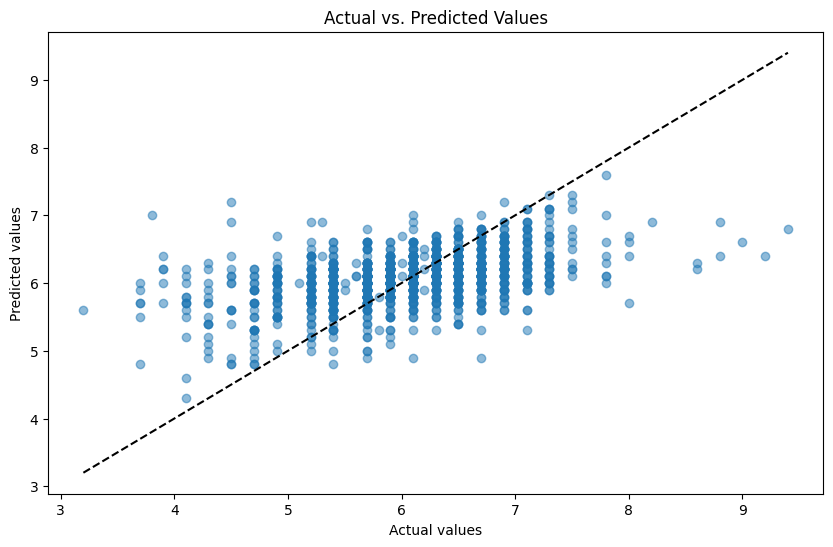

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--') 
plt.show()

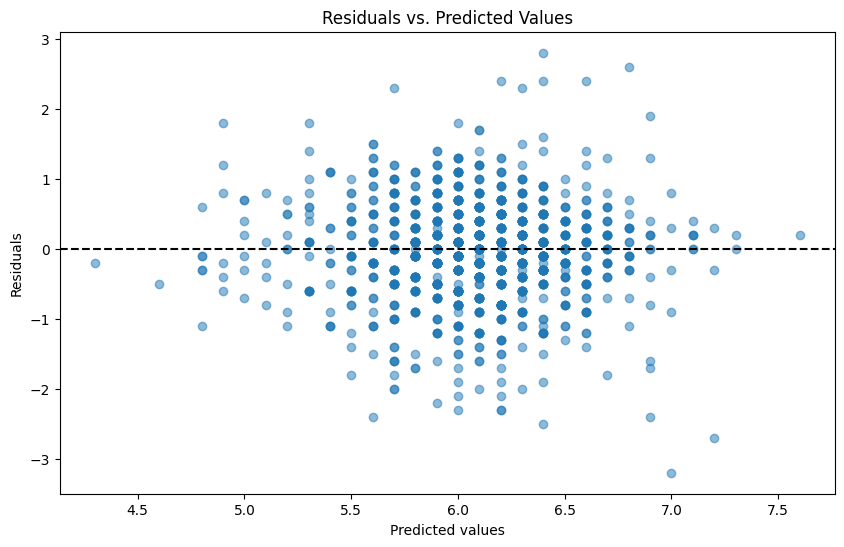

In [59]:
# calculate the residual
residuals = y_test - y_pred

# plot the residual
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='k', linestyle='--')
plt.show()

### 4.3 RandomForest Model

#### 4.3.1 Train RandomForest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10)

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
rf_cv_mse = -rf_cv_scores.mean()
print(f"Random Forest 5-fold CV MSE: {rf_cv_mse}")

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)
# Normallize the result to the same decimal format of y_test
y_rf_pred = np.round(y_rf_pred,1)


# Evaluate the model using Mean Squared Error on the test set
test_mse_rf = mean_squared_error(y_test, y_rf_pred)
test_mae = mean_absolute_error(y_test, y_rf_pred)
test_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Test MSE: {test_mse_rf}")
print(f"Random Forest Test MAE: {test_mae}")
print(f"Random Forest TestTest R2: {test_r2}")

Random Forest 5-fold CV MSE: 0.4104094577929046
Random Forest Test MSE: 0.4519702892885065
Random Forest Test MAE: 0.4666927286942924
Random Forest TestTest R2: 0.26919007410052365


#### 4.3.2 Hyper Tuning for Random Forest Model

In [61]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding CV MSE
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_best_rf_pred = best_rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
best_test_mse_rf = mean_squared_error(y_test, y_best_rf_pred)
print(f"Best Random Forest Test MSE: {best_test_mse_rf}")


Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV MSE: 0.4104094577929046
Best Random Forest Test MSE: 0.4545845994917035


#### 4.3.3 Plot the Result of RandomForest Model

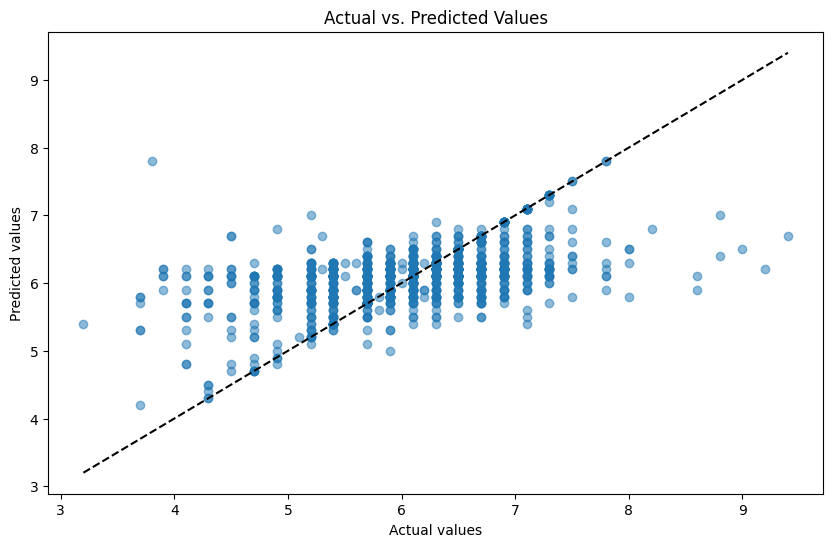

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--') 
plt.show()

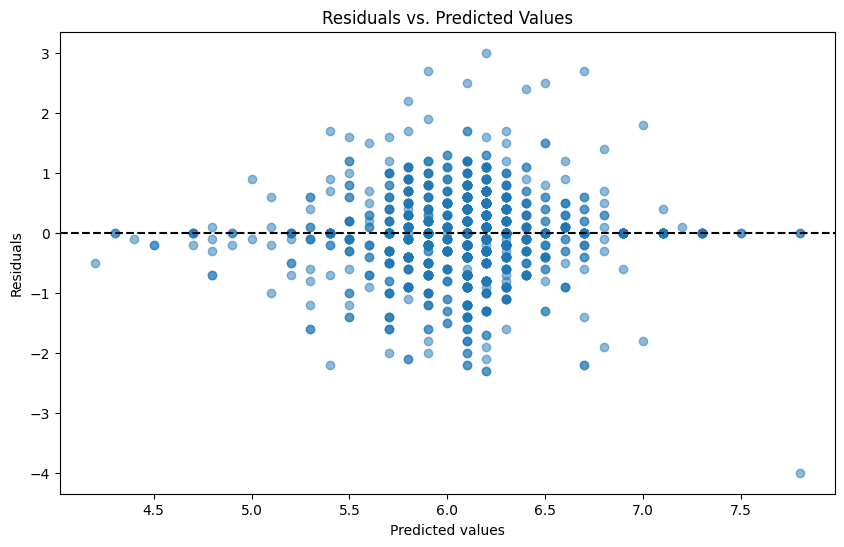

In [64]:
# calculate the residual
residuals = y_test - y_rf_pred

# plot the residual
plt.figure(figsize=(10, 6))
plt.scatter(y_rf_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='k', linestyle='--')
plt.show()

### 4.4 GradientBoosting Model

### 4.4.1 Train the GradientBoosting Model

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 5-fold cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
gb_cv_mse = -gb_cv_scores.mean()
print(f"Gradient Boosting 5-fold CV MSE: {gb_cv_mse}")

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_gb_pred = gb_model.predict(X_test)
# Normallize the result to the same decimal format of y_test
y_gb_pred = np.round(y_gb_pred,1)

# Evaluate the model using Mean Squared Error on the test set
test_mse_gb = mean_squared_error(y_test, y_gb_pred)
test_mae = mean_absolute_error(y_test, y_gb_pred)
test_r2 = r2_score(y_test, y_gb_pred)

print(f"Gradient Boosting Test MSE: {test_mse_gb}")
print(f"Gradient Boosting Test MAE: {test_mae}")
print(f"Gradient Boosting TestTest R2: {test_r2}")


Gradient Boosting 5-fold CV MSE: 0.4095871644548369
Gradient Boosting Test MSE: 0.4633854573885847
Gradient Boosting Test MAE: 0.4867083659108678
Gradient Boosting TestTest R2: 0.25073240475575154


### 4.4.2 Hyper Tuning for GradientBoosting Model

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Best CV MSE: {-grid_search_gb.best_score_}")

# Get the best estimator directly
best_gb_model = grid_search_gb.best_estimator_

# Predict on the test set using the best estimator
y_best_gb_pred = best_gb_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
best_test_mse_gb = mean_squared_error(y_test, y_best_gb_pred)
print(f"Best Gradient Boosting Test MSE: {best_test_mse_gb}")


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best CV MSE: 0.4095871644548369
Best Gradient Boosting Test MSE: 0.4625699230854125


### 4.4.3 Plot the Result of GradientBoosting

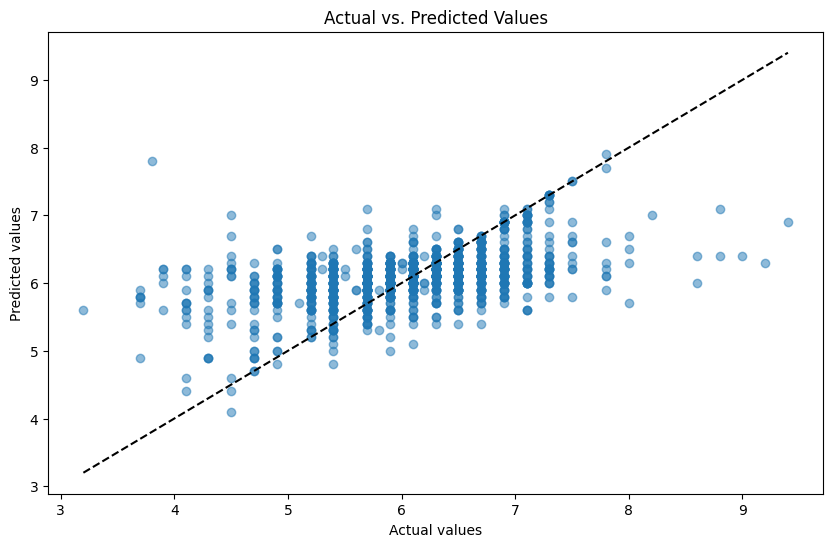

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_gb_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--') 
plt.show()

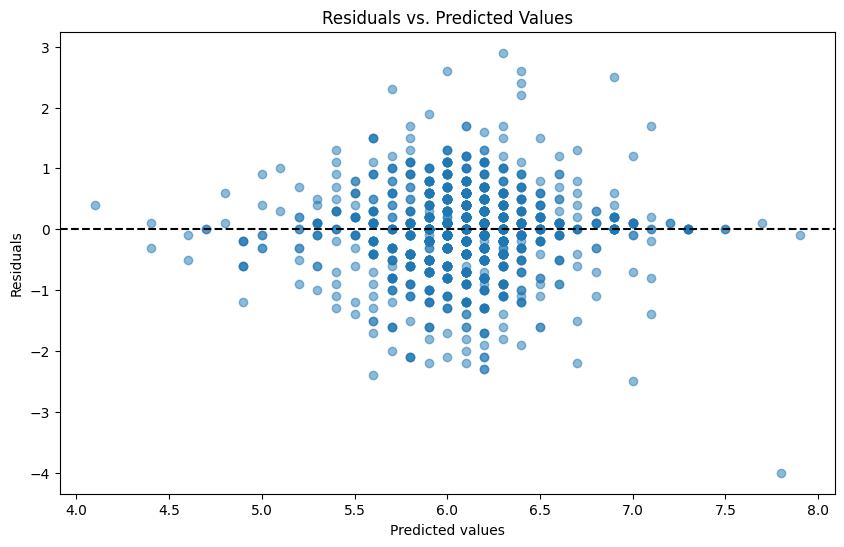

In [68]:
# calculate the residual
residuals = y_test - y_gb_pred

# plot the residual
plt.figure(figsize=(10, 6))
plt.scatter(y_gb_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='k', linestyle='--') 
plt.show()

## 4.4 Neuro Network Model

### 4.4.1 Train the Neuro Network Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='linear'))

# Compile the model
model.compile(optimizer='SGD', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=100,validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model
MSE = model.evaluate(X_test_scaled, y_test, verbose=2)
print('Test loss:', MSE)


D:\Pycharm\Projects\Machine Learning\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 - 1s - 10ms/step - loss: 4.9645 - val_loss: 0.8391
Epoch 2/50
52/52 - 0s - 2ms/step - loss: 0.7079 - val_loss: 0.7213
Epoch 3/50
52/52 - 0s - 2ms/step - loss: 0.5941 - val_loss: 0.6908
Epoch 4/50
52/52 - 0s - 2ms/step - loss: 0.5562 - val_loss: 0.6370
Epoch 5/50
52/52 - 0s - 2ms/step - loss: 0.5436 - val_loss: 1.0204
Epoch 6/50
52/52 - 0s - 3ms/step - loss: 0.5185 - val_loss: 0.6179
Epoch 7/50
52/52 - 0s - 3ms/step - loss: 0.4982 - val_loss: 0.6245
Epoch 8/50
52/52 - 0s - 2ms/step - loss: 0.4940 - val_loss: 0.5850
Epoch 9/50
52/52 - 0s - 2ms/step - loss: 0.4769 - val_loss: 0.5900
Epoch 10/50
52/52 - 0s - 2ms/step - loss: 0.4727 - val_loss: 0.6108
Epoch 11/50
52/52 - 0s - 3ms/step - loss: 0.4626 - val_loss: 0.5656
Epoch 12/50
52/52 - 0s - 3ms/step - loss: 0.4573 - val_loss: 0.5794
Epoch 13/50
52/52 - 0s - 3ms/step - loss: 0.4471 - val_loss: 0.5620
Epoch 14/50
52/52 - 0s - 2ms/step - loss: 0.4414 - val_loss: 0.5558
Epoch 15/50
52/52 - 0s - 3ms/step - loss: 0.4369 - val_l

In [69]:
# Make predictions
y_nn_pred = model.predict(X_test_scaled)
# # Normallize the result to the same decimal format of y_test
y_nn_pred = np.round(y_nn_pred,1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [75]:
# reshape the result to get calculate the MSE
y_nn_pred=np.reshape(y_nn_pred,-1)
      
test_mse = mean_squared_error(y_test, y_nn_pred)
test_mae = mean_absolute_error(y_test, y_nn_pred)
test_r2 = r2_score(y_test, y_nn_pred)

print(f"Neuro Network Test MSE: {test_mse}")
print(f"Neuro Network Test MAE: {test_mae}")
print(f"Neuro Network TestTest R2: {test_r2}")

Neuro Network Test MSE: 0.5270523797990568
Neuro Network Test MAE: 0.5451133741448873
Neuro Network TestTest R2: 0.14778665820614967


### 4.4.2 Plot the Result of Neuro Network Model

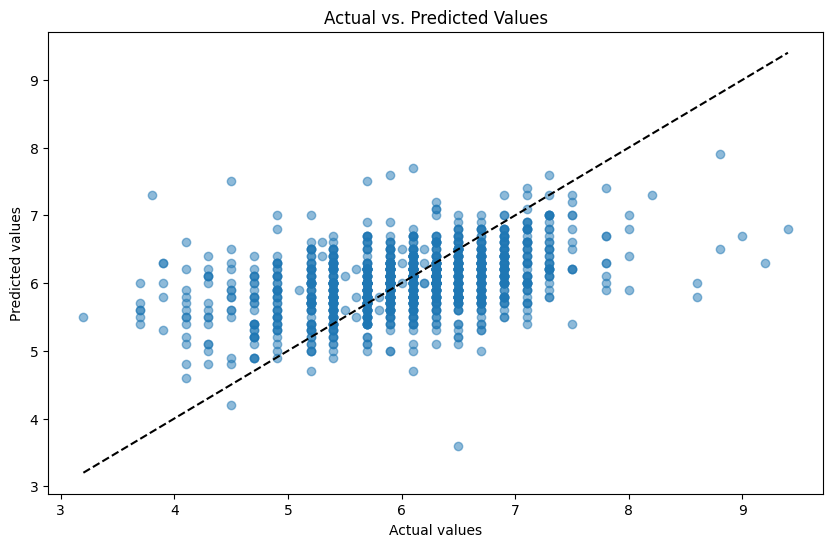

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_nn_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--') 
plt.show()

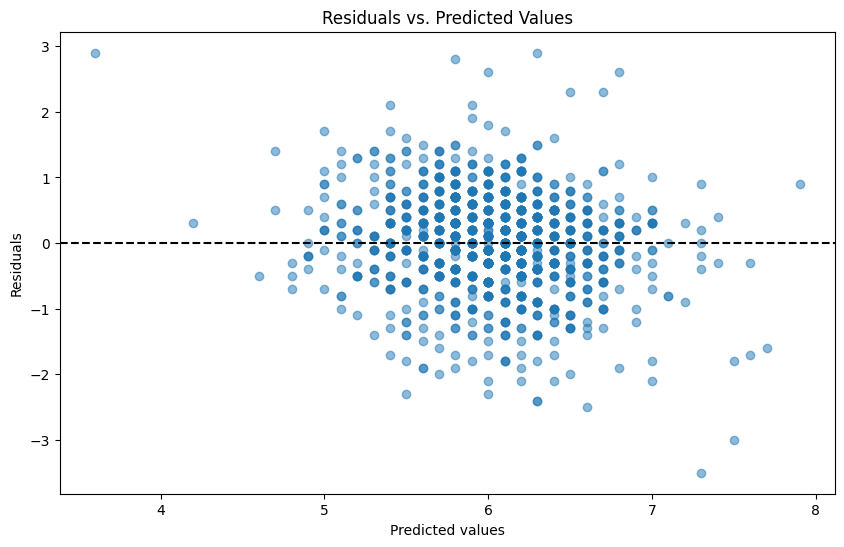

In [72]:
# calculate the residual
residuals = y_test - y_nn_pred

# plot the residual
plt.figure(figsize=(10, 6))
plt.scatter(y_nn_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='k', linestyle='--')
plt.show()